In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("Online_Retail.csv", encoding='windows-1254')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [3]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
df.dropna(inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [5]:
def outliers(data):
    outlier=[]

    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    for y in data:
        z_score = (y-mean)/std
        if np.abs(z_score)>3:
            outlier.append(y)
    
    return outlier

num_cols = df._get_numeric_data().columns[:-1]

for item in num_cols:
    mean = np.mean(df[f'{item}'])
    print(f'Mean {item} : {mean}') 
    outlier = outliers(df[f'{item}'])
    df[f'{item}'].replace(outlier, mean, inplace=True)
    print(outlier)

    

Mean Quantity : 12.06130339774205
[-9360, 1824, 2880, 1400, 1440, 972, 972, 1008, 1008, 1000, 1488, 1394, 1728, 2400, 960, 1296, 860, 1010, 1356, 1284, 1930, 2000, 3114, 1300, 74215, -74215, 1440, 900, 2592, 800, 1200, 864, 1296, 1296, 1296, 2400, 1056, 1500, 2400, 3906, 1152, 1200, 1152, 864, 864, 768, 900, 800, 1200, 1296, 2160, 1000, 1440, 864, 1200, 1152, 864, 1152, 864, 1200, 1056, 1728, -1300, -1930, -2000, -3114, 1930, 1300, 2000, 3114, 960, 960, 960, 960, 1008, 1200, 1200, 1152, 2000, -960, 1350, 1200, -1350, 864, 2700, 906, 888, 888, 960, 4300, 1152, 1600, 1200, 1515, -1515, 864, 828, 768, 768, 1200, 864, 1440, 3186, 900, 960, 1440, 1440, 1440, 1000, 1008, 1900, 2880, 968, 824, -828, 1200, 2000, 1000, 1440, 1152, 840, 960, 1000, 864, 1788, 1878, 1944, 1944, 1428, 852, 1412, -756, 1200, 1000, 1200, 960, 1540, -1200, 1000, 1296, 840, 1296, -840, -1296, -1296, 1296, 840, 1728, 1200, 960, 960, 2400, 4800, 912, 1992, 3000, 864, 832, 992, 1020, 2100, 1200, 1200, 1000, 960, 864, 1000

In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Diff'] = max(df['InvoiceDate']) - df['InvoiceDate']
recency = df.groupby('CustomerID')['Diff'].min()
recency = recency.dt.days
recency = recency.reset_index()
recency

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3


In [7]:
frequency = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
frequency 

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [8]:
df['Amount'] = df['Quantity']*df['UnitPrice']
monetary = df.groupby('CustomerID')['Amount'].sum().reset_index()
monetary

,CustomerID,Amount
0,12346.0,25.087511
1,12347.0,4310.000000
2,12348.0,1797.240000
3,12349.0,1461.010471
4,12350.0,334.400000
...,...,...
4367,18280.0,180.600000
4368,18281.0,80.820000
4369,18282.0,176.600000
4370,18283.0,2094.880000


In [12]:
rfm = pd.merge(recency, frequency, on='CustomerID')
rfm = pd.merge(rfm, monetary, on='CustomerID')
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,25.087511
1,12347.0,1,182,4310.000000
2,12348.0,74,31,1797.240000
3,12349.0,18,73,1461.010471
4,12350.0,309,17,334.400000
...,...,...,...,...
4367,18280.0,277,10,180.600000
4368,18281.0,180,7,80.820000
4369,18282.0,7,13,176.600000
4370,18283.0,3,756,2094.880000


In [13]:
from sklearn.preprocessing import StandardScaler

In [19]:
rfm_scaled = rfm[['Recency', 'Frequency', 'Monetary']]
rfm_scaled = StandardScaler().fit_transform(rfm_scaled)
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.columns = ['Recency', 'Frequency', 'Monetary']
rfm_scaled

,Recency,Frequency,Monetary
0,2.322023,-0.391720,-0.233555
1,-0.893733,0.382657,0.312245
2,-0.169196,-0.266959,-0.007823
3,-0.725005,-0.086271,-0.050651
4,2.163220,-0.327188,-0.194155
...,...,...,...
4367,1.845615,-0.357303,-0.213746
4368,0.882873,-0.370209,-0.226456
4369,-0.834182,-0.344397,-0.214255
4370,-0.873883,2.852058,0.030089


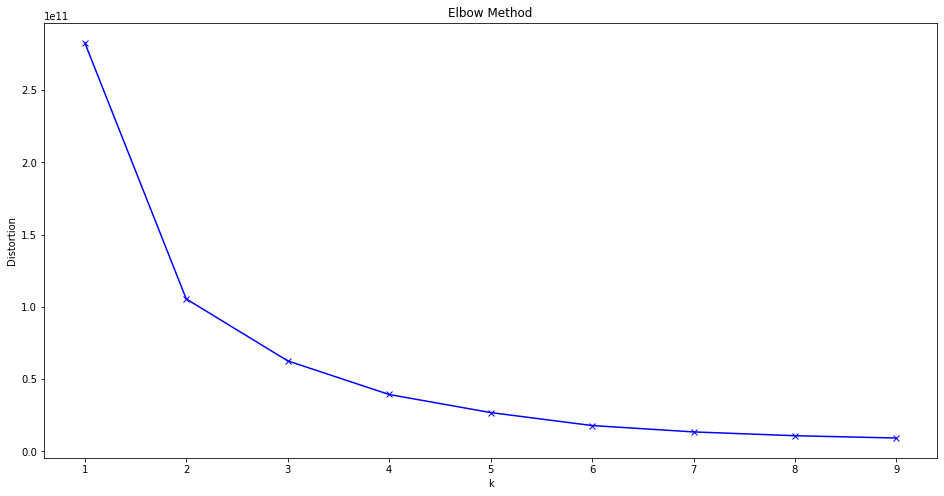

In [22]:
from sklearn.cluster import KMeans
distortions = []
range_n_clusters = range(1, 10)
for num_cluster in range_n_clusters :
    kmeans = KMeans(n_clusters=num_cluster)
    kmeans.fit(rfm)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(range_n_clusters, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

In [23]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(rfm_scaled)

KMeans(n_clusters=3)

In [24]:
rfm_scaled['Cluster'] = kmeans.labels_
rfm_scaled

,Recency,Frequency,Monetary,Cluster
0,2.322023,-0.391720,-0.233555,1
1,-0.893733,0.382657,0.312245,0
2,-0.169196,-0.266959,-0.007823,0
3,-0.725005,-0.086271,-0.050651,0
4,2.163220,-0.327188,-0.194155,1
...,...,...,...,...
4367,1.845615,-0.357303,-0.213746,1
4368,0.882873,-0.370209,-0.226456,1
4369,-0.834182,-0.344397,-0.214255,0
4370,-0.873883,2.852058,0.030089,0


<Figure size 1440x1080 with 0 Axes>

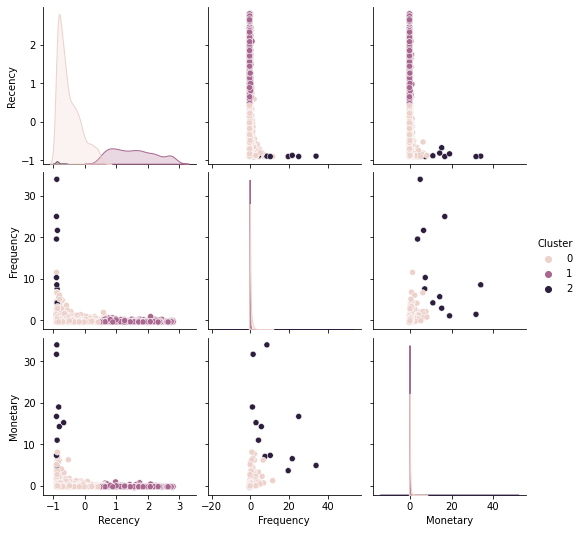

In [25]:
plt.figure(figsize=(20, 15))
sns.pairplot(rfm_scaled[['Recency', 'Frequency', 'Monetary', 'Cluster']], hue='Cluster')
plt.show()

In [26]:
summary_df = rfm_scaled[['Recency', 'Frequency', 'Monetary', 'Cluster']].groupby('Cluster').mean()
summary_df

,Recency,Frequency,Monetary
Cluster,,,
0,-0.513707,0.050932,0.008036
1,1.541206,-0.281637,-0.180360
2,-0.863958,11.841639,14.271508


In [29]:
rfm_scaled["Cluster"].value_counts()

0    3265
1    1095
2      12
Name: Cluster, dtype: int64

In [31]:
summary_df['Total'] = rfm_scaled["Cluster"].value_counts()
summary_df

,Recency,Frequency,Monetary,Total
Cluster,,,,
0,-0.513707,0.050932,0.008036,3265
1,1.541206,-0.281637,-0.180360,1095
2,-0.863958,11.841639,14.271508,12


In [35]:
def draw_plot(column_x, column_y, size=(8, 8)):
  plt.figure(figsize=size)
  sns.scatterplot(x=column_x, y=column_y, hue=rfm_scaled['Cluster'])
  plt.show()

In [37]:
def draw_boxplot(column, size=(8, 8)):
  plt.figure(figsize=size)
  sns.boxplot(x='Cluster', y=f'{column}', data=rfm_scaled)
  plt.show()

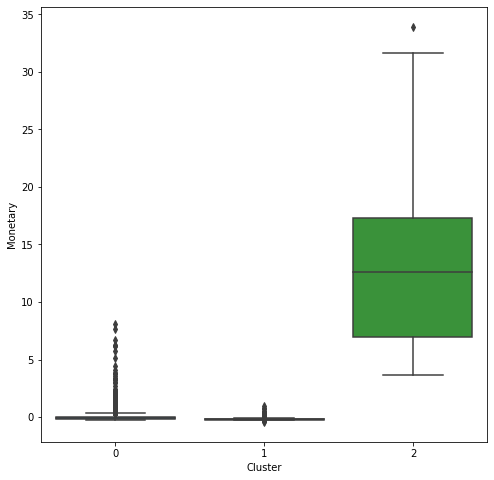

In [38]:
draw_boxplot('Monetary')

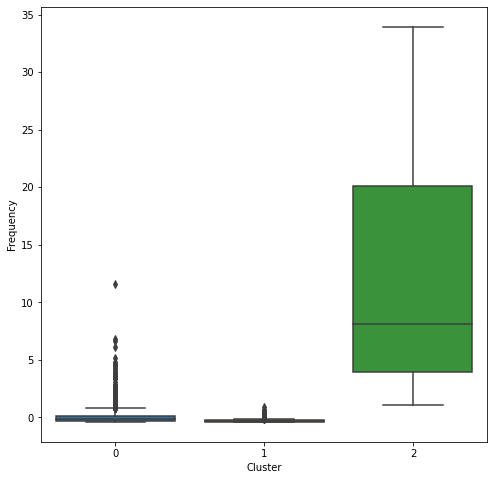

In [39]:
draw_boxplot('Frequency')

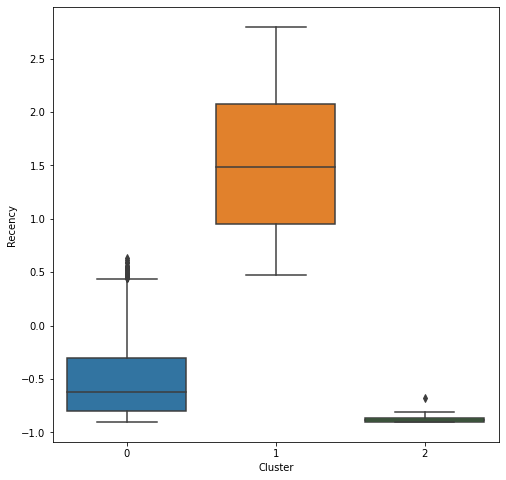

In [40]:
draw_boxplot('Recency')

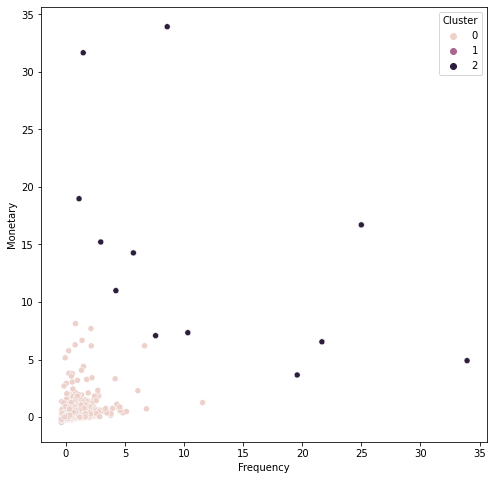

In [42]:
draw_plot(rfm_scaled['Frequency'], rfm_scaled['Monetary'])

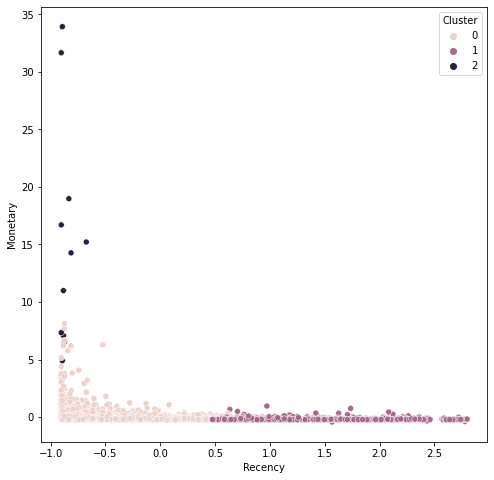

In [ ]:
draw_plot(rfm_scaled['Recency'], rfm_scaled['Monetary'])

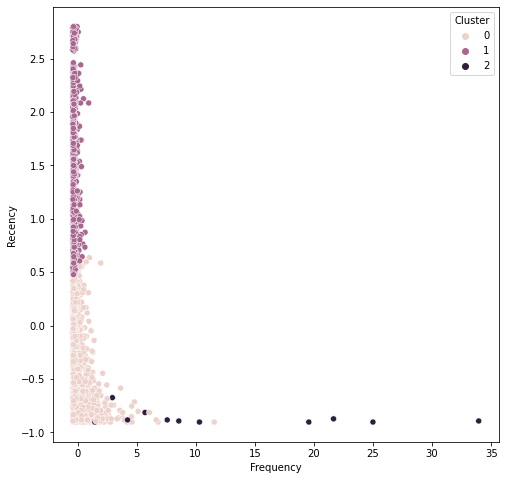

In [45]:
draw_plot(rfm_scaled['Frequency'], rfm_scaled['Recency'])

In [46]:
rfm_scaled['CustomerID'] = rfm['CustomerID']
rfm_scaled.sort_values(by=['CustomerID'])

,Recency,Frequency,Monetary,Cluster,CustomerID
0,2.322023,-0.391720,-0.233555,1,12346.0
1,-0.893733,0.382657,0.312245,0,12347.0
2,-0.169196,-0.266959,-0.007823,0,12348.0
3,-0.725005,-0.086271,-0.050651,0,12349.0
4,2.163220,-0.327188,-0.194155,1,12350.0
...,...,...,...,...,...
4367,1.845615,-0.357303,-0.213746,1,18280.0
4368,0.882873,-0.370209,-0.226456,1,18281.0
4369,-0.834182,-0.344397,-0.214255,0,18282.0
4370,-0.873883,2.852058,0.030089,0,18283.0


By making these extensive analysis below points are interpreted:

* Cluster 0 : Likely contains low-value customers with high recency, low frequency, and low monetary contributions. They might need re-engagement strategies or could represent less profitable segments.

* Cluster 1 : Represents mid-tier customers with moderate recency, frequency, and monetary values. These customers could be converted into high-value customers with appropriate engagement strategies.

* Cluster 2 : High-value customers with low recency (recent transactions), high frequency, and high monetary value. They are the most profitable and likely need retention-focused strategies.

Furthermore key action points for these customer categories:

* Low-value cluster (Cluster 0) : Initiate targeted campaigns (e.g., discounts, personalized offers) to re-engage these customers.

* Mid-value cluster (Cluster 1) : Encourage higher spending or frequency through upselling or cross-selling.

* High-value cluster (Cluster 2) : Focus on loyalty programs and exclusive benefits to retain these top customers.